

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The follwing is an analysis of US gun dataset using python data analysis libraries.
>
> I want to explore which state has the highest gun possession and which type guns. Also try to explain why!

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:

import pandas as pd
df_GunData = pd.read_excel('gun-data.xlsx')
df_Census_data = pd.read_csv('u.s.-census-data.csv')
import matplotlib.pyplot as plt



### Data Cleaning

In [3]:

#previw the data
df_GunData.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [24]:
df_GunData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [25]:
df_Census_data .head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [26]:
df_Census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [28]:
#The gun table is sorted by the date. I want to see the data using the state, so a groupby function is used as follows:
# All I need is the permits, hand gun and long gun
groupedBySatate = df_GunData.groupby('state')['permit','handgun','long_gun'].sum()

In [29]:
#preview the groupby
groupedBySatate

,permit,handgun,long_gun
state,,,
Alabama,1047441.0,2222037.0,2626029.0
Alaska,13352.0,434602.0,572174.0
Arizona,710509.0,1781468.0,1480762.0
Arkansas,507951.0,965584.0,1663256.0
California,6530543.0,5910880.0,5936770.0
Colorado,426970.0,2528422.0,2726033.0
Connecticut,1595270.0,879260.0,638096.0
Delaware,22720.0,208109.0,242235.0
District of Columbia,330.0,4570.0,605.0


In [30]:
#I want to transpose the table census, so it matches the gun table." Sorted by state"
#where the states will be the rows instead of columns,
#saved it into new variable
df_Census_data_Transposed = df_Census_data.T

In [31]:
#Previw
df_Census_data_Transposed

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Drop the first row that is labeled Fact
df_Census_data_Transposed = df_Census_data_Transposed.drop("Fact" , axis=0)


In [33]:
#Preview
df_Census_data_Transposed

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Drop the first row that is labeled Fact Note
df_Census_data_Transposed = df_Census_data_Transposed.drop("Fact Note" , axis=0)

In [35]:
#Preview
df_Census_data_Transposed

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,10.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Rename the column from name 0 to name population
df_Census_data_Transposed.rename({0: "Population"}, axis= 'columns', inplace = True)

In [37]:
#Preview
df_Census_data_Transposed

,Population,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,10.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Dropping the unneeded coulumns
df_Census_data_Transposed = df_Census_data_Transposed.drop(range (1,85) , axis=1)

In [39]:
#Preview
df_Census_data_Transposed

,Population
Alabama,"4,863,300"
Alaska,"741,894"
Arizona,"6,931,071"
Arkansas,"2,988,248"
California,"39,250,017"
Colorado,"5,540,545"
Connecticut,"3,576,452"
Delaware,"952,065"
Florida,"20,612,439"
Georgia,"10,310,371"



## Exploratory Data Analysis

### Research Question 1 
### What is the number of gun permit per capita ?
### To do that I will divide the number of gun permit by pupulation.

In [40]:
# Firat I will merge the needed data into onte table
all_data = pd.merge(df_Census_data_Transposed, groupedBySatate, right_index= True, left_index= True)

In [41]:
all_data.head()

,Population,permit,handgun,long_gun
Alabama,"4,863,300",1047441.0,2222037.0,2626029.0
Alaska,"741,894",13352.0,434602.0,572174.0
Arizona,"6,931,071",710509.0,1781468.0,1480762.0
Arkansas,"2,988,248",507951.0,965584.0,1663256.0
California,"39,250,017",6530543.0,5910880.0,5936770.0


In [4]:
#population is str type, and has comma seperated, 
#needs to remove commas then convert the Population column data type from string to float.
#to get the division to work
#Reference:
#https://stackoverflow.com/questions/39125665/cannot-convert-string-to-float-in-pandas-valueerror

In [42]:
#Converting data type and removing commas
all_data['Population'] = all_data['Population'].apply(lambda x: float(x.split()[0].replace(',', '')))

In [43]:
#Preview
all_data.dtypes

Population    float64
permit        float64
handgun       float64
long_gun      float64
dtype: object

In [44]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Population    50 non-null float64
permit        50 non-null float64
handgun       50 non-null float64
long_gun      50 non-null float64
dtypes: float64(4)
memory usage: 2.0+ KB


In [55]:
#Question number 1: What is the permit per capita ?
all_data['permit_per_capita'] = all_data['Population']/all_data['permit']

In [49]:
# I need to add colu,n that has all the states so I can plot it against my data

states = ['Alabama','Alaska', 'Arizona','Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii' , 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York','North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']



In [50]:
#Make sure I had all 50 states in the list
print(len(states))

50


In [51]:
#Addig the states list as a new column
#Reference
#https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
all_data['states']=states

In [52]:
#preview
all_data.head(30)

,Population,permit,handgun,long_gun,states
Alabama,4863300.0,1047441.0,2222037.0,2626029.0,Alabama
Alaska,741894.0,13352.0,434602.0,572174.0,Alaska
Arizona,6931071.0,710509.0,1781468.0,1480762.0,Arizona
Arkansas,2988248.0,507951.0,965584.0,1663256.0,Arkansas
California,39250017.0,6530543.0,5910880.0,5936770.0,California
Colorado,5540545.0,426970.0,2528422.0,2726033.0,Colorado
Connecticut,3576452.0,1595270.0,879260.0,638096.0,Connecticut
Delaware,952065.0,22720.0,208109.0,242235.0,Delaware
Florida,20612439.0,1088802.0,5909952.0,3829090.0,Florida
Georgia,10310371.0,1786708.0,2127777.0,2288386.0,Georgia


In [69]:
# I want to analyze the permit per capit amoung 4 states only, they are { Pennsylvania , Texas , California, Florida}
# I have used iloc to select the rows I wanted. 
#Reference : https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

four_states = all_data.iloc[0:4, :]

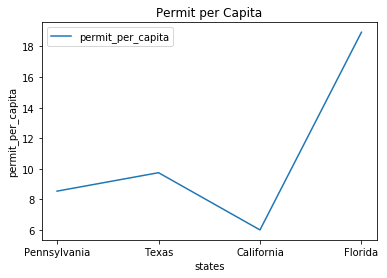

In [70]:
#Plotting data, to show the difference between the value of permit per capita for each of the four states.

plt.title('Permit per Capita')
plt.xlabel('states')
plt.ylabel('permit_per_capita')
plt.plot(four_states['states'] , four_states['permit_per_capita'] )
plt.legend()
plt.show()

# Findings :
## california has the heighst permit per capita amoung the 4 selected states.

In [ ]:
#Question numbe 2
#What are the top 5 states with hand gun and long gun
#Reference
#https://stackoverflow.com/questions/43859416/finding-top-10-in-a-dataframe-in-pandas

In [58]:
all_data.sort_values('handgun',ascending=False,inplace=True)
top_five_handgun_states = all_data['states'].head(5)
top_five_handgun_values = all_data['handgun'].head(5)

In [59]:
#Preview
top_five_handgun_states
top_five_handgun_values

Texas         6493832.0
California    5910880.0
Florida       5909952.0
Ohio          3791457.0
Tennessee     3117004.0
Name: handgun, dtype: float64

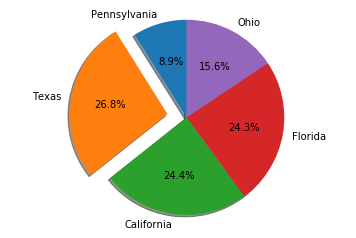

In [71]:
#Plotting using pie chart
#Refernce : https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Pennsylvania', 'Texas', 'California', 'Florida' , 'Ohio'
sizes = [2166025.0, 6493832.0, 5910880.0, 5909952.0,3791457.0]
explode = (0, 0.2, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Texas')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode = explode,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [65]:
all_data.sort_values('long_gun',ascending=False,inplace=True)
top_five_long_gun_states = all_data['states'].head(5)
top_five_long_gun_values = all_data['long_gun'].head(5)

In [72]:
#Preview
top_five_long_gun_states
top_five_long_gun_values 

Pennsylvania    9383642.0
Texas           7651396.0
California      5936770.0
Florida         3829090.0
Ohio            3646325.0
Name: long_gun, dtype: float64

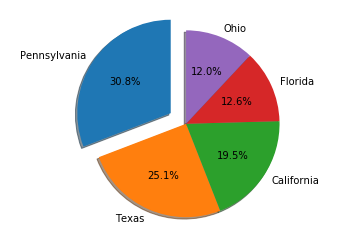

In [74]:
#Plotting using pie chart
#Refernce : https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Pennsylvania', 'Texas', 'California', 'Florida' , 'Ohio'
sizes = [9383642.0, 7651396.0, 5936770.0, 3829090.0,3646325.0]
explode = (0.2, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Texas')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode = explode,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Findings:
## the state that owned the most hand guns is Texas
### while Pennsylvania is the state that is top 1 in owning long gun.
### That might predict that people there are haunting a lot.